In [1]:
# Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
# Importing data from GitHub
df1 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/AMS_FluorineFlux_vsRigidity.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/baseline_vsR_0.3GV.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/baseline_vsR_0.9GV.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/baseline_vsR.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/nobreak_vsR_0.3GV.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/nobreak_vsR_0.9GV.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/sofia-llacer-caro/model-experiment-comparison/main/Data/nobreak_vsR_0.67GV.csv")

In [17]:
# AMS data
ams_rig = np.array(df1['X'])
ams_flux = np.array(df1['Y'])
ams_flux_err = np.array(df1['YErrorHigh'])
# Rescale flux to R^(2.7)
ams_flux_rig_rescale = ams_flux * (ams_rig ** 2.7)
ams_flux_rig_rescale_err = ams_flux_err * (ams_rig ** 2.7)


# SIMULATIONS DATA; bl0: baseline_vsR, bl3: baseline_vsR_0.3GV, bl9: baseline_vsR_0.9GV, nb3: no break, etc.
bl3_rig = np.array(df2['R'])
bl3_flux = np.array(df2['TOA'])
bl3_flux_rig_rescale = bl3_flux * (bl3_rig ** 2.7)


bl9_rig = np.array(df3['R'])
bl9_flux = np.array(df3['TOA'])
bl9_flux_rig_rescale = bl9_flux * (bl9_rig ** 2.7)


bl0_rig = np.array(df4['R'])
bl0_flux = np.array(df4['TOA'])
bl0_flux_rig_rescale = bl0_flux * (bl0_rig ** 2.7)


nb3_rig = np.array(df5['R'])
nb3_flux = np.array(df5['TOA'])
nb3_flux_rig_rescale = nb3_flux * (nb3_rig ** 2.7)


nb9_rig = np.array(df6['R'])
nb9_flux = np.array(df6['TOA'])
nb9_flux_rig_rescale = nb9_flux * (nb9_rig ** 2.7)


nb67_rig = np.array(df7['R'])
nb67_flux = np.array(df7['TOA'])
nb67_flux_rig_rescale = nb67_flux * (nb67_rig ** 2.7)

In [18]:
# INTERPOLATION OF BASELINE 0.3GV SIMULATION
tckbl3 = interpolate.splrep(bl3_rig, bl3_flux_rig_rescale, s=0)
new_bl3_flux_rig_rescale = interpolate.splev(ams_rig, tckbl3, der=0)

# INTERPOLATION OF BASELINE 0.9GV SIMULATION
tckbl9 = interpolate.splrep(bl9_rig, bl9_flux_rig_rescale, s=0)
new_bl9_flux_rig_rescale = interpolate.splev(ams_rig, tckbl9, der=0)

# INTERPOLATION OF BASELINE SIMULATION
tckbl0 = interpolate.splrep(bl0_rig, bl0_flux_rig_rescale, s=0)
new_bl0_flux_rig_rescale = interpolate.splev(ams_rig, tckbl0, der=0)

# INTERPOLATION OF NO BREAK 0.3GV SIMULATION
tcknb3 = interpolate.splrep(nb3_rig, nb3_flux_rig_rescale, s=0)
new_nb3_flux_rig_rescale = interpolate.splev(ams_rig, tcknb3, der=0)

# INTERPOLATION OF NO BREAK 0.9GV SIMULATION
tcknb9 = interpolate.splrep(nb9_rig, nb9_flux_rig_rescale, s=0)
new_nb9_flux_rig_rescale = interpolate.splev(ams_rig, tcknb9, der=0)

# INTERPOLATION OF NO BREAK 0.67GV SIMULATION
tcknb67 = interpolate.splrep(nb67_rig, nb67_flux_rig_rescale, s=0)
new_nb67_flux_rig_rescale = interpolate.splev(ams_rig, tcknb67, der=0)


#print(new_nb67_flux_rig_rescale)

C:\Users\sofia\AppData\Local\Temp\ipykernel_15996\3467078648.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(ams_rig, ams_flux_rig_rescale, '.', label = 'AMS data', marker = '.', markersize=2, color = 'cornflowerblue')


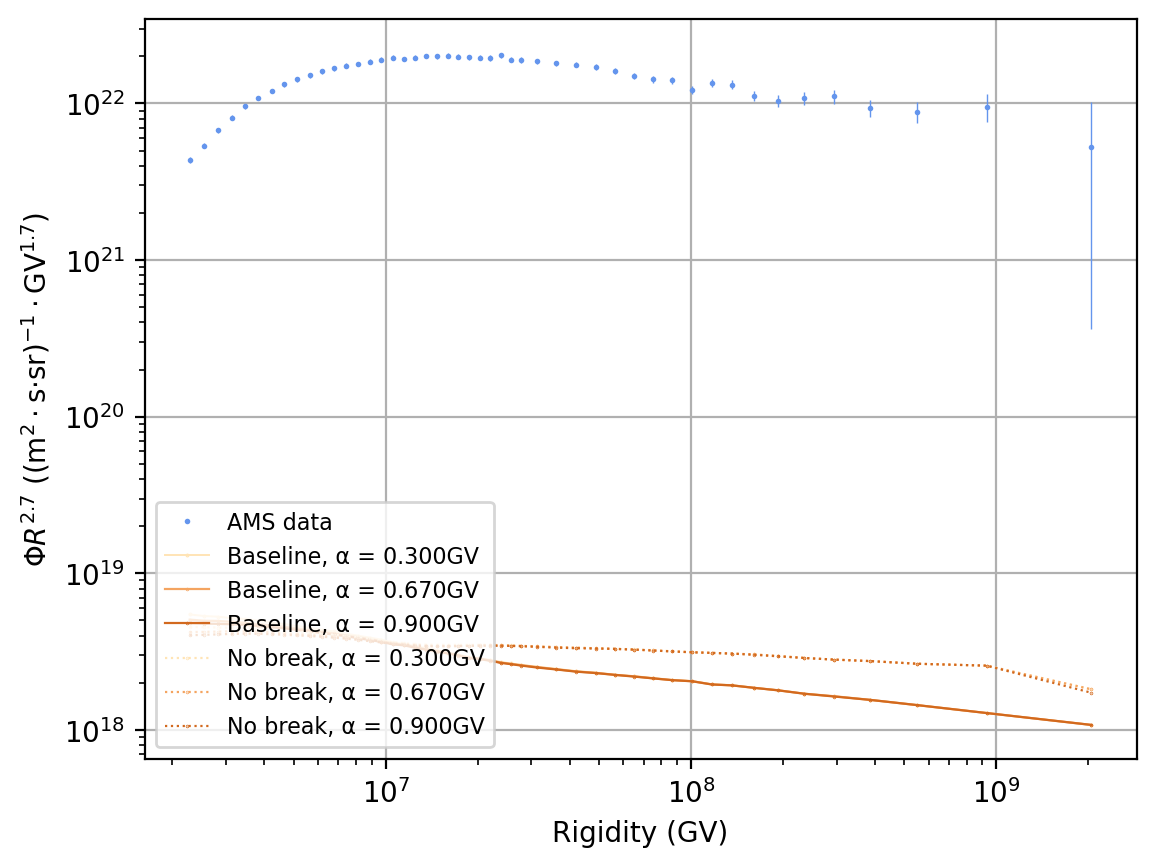

In [21]:
# Plot the results
fig, ax = plt.subplots(dpi=200)
ax.plot(ams_rig, ams_flux_rig_rescale, '.', label = 'AMS data', marker = '.', markersize=2, color = 'cornflowerblue')
ax.errorbar(ams_rig, ams_flux_rig_rescale, yerr=ams_flux_rig_rescale_err, marker = ',', linestyle='None', elinewidth=0.5, color = 'cornflowerblue')
ax.plot(ams_rig, new_bl3_flux_rig_rescale, '-', label = 'Baseline, α = 0.300GV', marker = '.', linewidth=0.7, markersize=0.8, color = 'moccasin')
ax.plot(ams_rig, new_bl0_flux_rig_rescale, '-', label = 'Baseline, α = 0.670GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'sandybrown')
ax.plot(ams_rig, new_bl9_flux_rig_rescale, '-', label = 'Baseline, α = 0.900GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'chocolate')
ax.plot(ams_rig, new_nb3_flux_rig_rescale, ':', label = 'No break, α = 0.300GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'moccasin')
ax.plot(ams_rig, new_nb67_flux_rig_rescale, ':', label = 'No break, α = 0.670GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'sandybrown')
ax.plot(ams_rig, new_nb9_flux_rig_rescale, ':', label = 'No break, α = 0.900GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'chocolate')

ax.legend(loc=3, prop={'size': 8})
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Rigidity (GV)')
ax.set_ylabel('$\Phi R^{2.7}$ ((m$^2\cdot$s$\cdot$sr)$^{-1}\cdot$GV$^{1.7}$)') #m^{2} s sr GV)^{-1})
ax.grid('True')

In [15]:
# RESIDUE DATA
res_ams = np.subtract(ams_flux_rig_rescale, ams_flux_rig_rescale)
res_bl3 = np.subtract(new_bl3_flux_rig_rescale, ams_flux_rig_rescale)
res_bl9 = np.subtract(new_bl9_flux_rig_rescale, ams_flux_rig_rescale)
res_bl0 = np.subtract(new_bl0_flux_rig_rescale, ams_flux_rig_rescale)
res_nb3 = np.subtract(new_nb3_flux_rig_rescale, ams_flux_rig_rescale)
res_nb9 = np.subtract(new_nb9_flux_rig_rescale, ams_flux_rig_rescale)
res_nb67 = np.subtract(new_nb67_flux_rig_rescale, ams_flux_rig_rescale)

C:\Users\sofia\AppData\Local\Temp\ipykernel_15996\3112623629.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(ams_rig, res_ams, '.', label = 'AMS data', marker = '.', markersize=2, color = 'cornflowerblue')


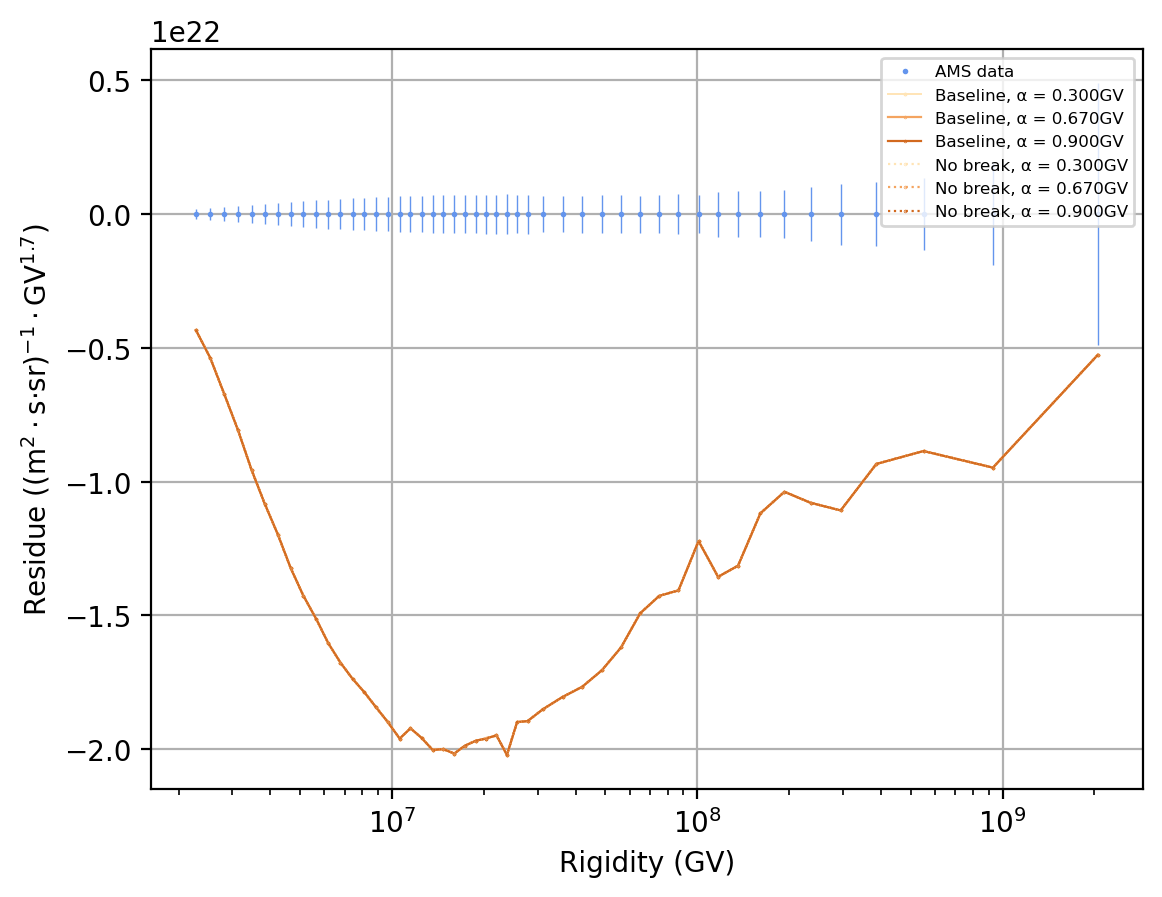

In [16]:
# PLOT RESIDUE DATA
fig, ax = plt.subplots(dpi=200)
ax.plot(ams_rig, res_ams, '.', label = 'AMS data', marker = '.', markersize=2, color = 'cornflowerblue')
ax.errorbar(ams_rig, res_ams, yerr=ams_flux_rig_rescale_err, marker = ',', linestyle='None', elinewidth=0.5, color = 'cornflowerblue')

ax.plot(ams_rig, res_bl3, '-', label = 'Baseline, α = 0.300GV', marker = '.', linewidth=0.7, markersize=0.8, color = 'moccasin')
ax.plot(ams_rig, res_bl0, '-', label = 'Baseline, α = 0.670GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'sandybrown')
ax.plot(ams_rig, res_bl9, '-', label = 'Baseline, α = 0.900GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'chocolate')
ax.plot(ams_rig, res_nb3, ':', label = 'No break, α = 0.300GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'moccasin')
ax.plot(ams_rig, res_nb67, ':', label = 'No break, α = 0.670GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'sandybrown')
ax.plot(ams_rig, res_nb9, ':', label = 'No break, α = 0.900GV', marker = '.', markersize=0.5, linewidth=0.8, color = 'chocolate')

ax.legend(loc=1, prop={'size': 6})
ax.set_xscale('log')
ax.set_xlabel('Rigidity (GV)')
ax.set_ylabel('Residue ((m$^2\cdot$s$\cdot$sr)$^{-1}\cdot$GV$^{1.7}$)')
ax.grid('True')